# What is Scikit-learn?
- Scikit-learn (also known as __sklearn__) is an open source __machine learning library__ for the __Python programming language.__ 
- It features various __classification, regression and clustering algorithms__ including support-vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. 
- It provides various tools (utility packages/functions) for __data preprocessing__, __data modeling__ (e.g., model fitting,  model selection, model evaluation) and __data clustering__, etc.
- If you install anaconda in your laptop, scikit-learn is already installed. Otherwise, please run `! pip install scikit-learn` first.

## Data Preprocessing
The `sklearn.preprocessing` package provides several common utility functions and transformer classes to change raw feature vectors into a representation that is more suitable for the downstream estimators. 

###  Data Standardization
- Standardization is widely used as a preprocessing step in many ML algorithms to __rescale the features to zero-mean and unit-variance__. 
- The `preprocessing` module provides the `StandardScaler` utility class, which standardizes features by __removing the mean and scaling to unit variance.__ 
- The standard score of __a sample x__ is calculated as: __z = (x - u) / s__, where u is the mean of the training samples, and s is the standard deviation of the training samples

In [1]:
from sklearn import preprocessing
import numpy as np
X_original = np.array([[ 1., -1.,  2.],
                       [ 2.,  0.,  0.],
                       [ 0.,  1., -1.]])
print('X_original: \n' + str(X_original))

# fit(X) function computes the mean and std of X to be used for later scaling. It returns the created object itself.
scaler = preprocessing.StandardScaler().fit(X_original) 
print('original mean:' + str(scaler.mean_))  # scaler.mean_ shows the mean value for each feature in the training set
print('original std:' + str(np.sqrt(scaler.var_))) # scaler.var_ shows variance for each feature in the training set

X_original: 
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
original mean:[1.         0.         0.33333333]
original std:[0.81649658 0.81649658 1.24721913]


In [2]:
# transform(X) function transforms X. It returns a transformed version of X.
X_scaled = scaler.transform(X_original)
print('X_scaled: \n' + str(X_scaled))
# Scaled data has zero mean and unit variance
print('new mean:' + str(X_scaled.mean(axis=0)))
print('new std:' + str( X_scaled.std(axis=0))) 

X_scaled: 
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
new mean:[0. 0. 0.]
new std:[1. 1. 1.]


In [3]:
scaler1 = preprocessing.StandardScaler()
# fit_transform(X) function fits to data X, then transforms X. It returns a transformed version of X.
X_scaled1 = scaler1.fit_transform(X_original)
print('X_scaled1: \n' + str(X_scaled1))
# Scaled data has zero mean and unit variance
print('new mean:' + str(X_scaled1.mean(axis=0)))
print('new std:' + str( X_scaled1.std(axis=0))) 

X_scaled1: 
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
new mean:[0. 0. 0.]
new std:[1. 1. 1.]


####  Other scaling ways
- Range scaling: `MinMaxScaler` transforms features to lie between a given minimum and maximum value.
The transformation is given by:
> X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)) <br>
  X_scaled = X_std * (max - min) + min
- Robust scaling: `RobustScaler` transforms features using statistics that __are robust to outliers__. Too many outliers can often influence the sample mean/variance in a negative way. In such cases, the median and the interquartile range often give better results. RobustScaler __removes the median and scales the data according to the quantile range__ (defaults to IQR: Interquartile Range).


In [4]:
X_original= np.array([[ 1., -1.,  2.],
              [ 2.,  0.,  0.],
              [ 0.,  1., -1.]])
print('X_original: \n' + str(X_original))

min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
# fit_transform(X) function fits to data X and then transforms it. It returns a transformed version of X.
X_minmax_scaled = min_max_scaler.fit_transform(X_original)
print('X_minmax_scaled:')
print(X_minmax_scaled)

X_original: 
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
X_minmax_scaled:
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]


In [5]:
X_original = np.array([[ 1., -2.,  2.],
                       [ -2.,  1.,  3.],
                       [ 4.,  1., -2.]])
print('X_original: \n' + str(X_original))

robust_scaler = preprocessing.RobustScaler()
X_robust_scaled = robust_scaler.fit_transform(X_original)
print('X_robust_scaled: \n' + str(X_robust_scaled))

X_original: 
[[ 1. -2.  2.]
 [-2.  1.  3.]
 [ 4.  1. -2.]]
X_robust_scaled: 
[[ 0.  -2.   0. ]
 [-1.   0.   0.4]
 [ 1.   0.  -1.6]]


###  Data Normalization 
Normalization is the __process of scaling individual samples to have unit norm__. This process can be useful if you plan to use a quadratic form such as the dot-product or any other kernel to quantify the similarity of any pair of samples. The utility class `Normalizer` provides a quick and easy way to perform this operation on a single array-like dataset, either using the __`l1`, `l2`, or `max` norms__.

In [6]:
X_original = np.array([[4, 1, 2, 2],
                      [1, 3, 9, 3],
                      [5, 7, 5, 1]])
print('X_original: \n' + str(X_original))
print('L2 norm of X:\n' + str(np.linalg.norm(X_original, axis=1, keepdims=True)))

normalizer = preprocessing.Normalizer(norm ='l2')
X_normalizd = normalizer.fit_transform(X_original)
print('X_normalizd: \n' + str(X_normalizd))
print('L2 norm of X_normalizd: \n' + str(np.linalg.norm(X_normalizd, axis=1, keepdims=True)))

X_original: 
[[4 1 2 2]
 [1 3 9 3]
 [5 7 5 1]]
L2 norm of X:
[[ 5.]
 [10.]
 [10.]]
X_normalizd: 
[[0.8 0.2 0.4 0.4]
 [0.1 0.3 0.9 0.3]
 [0.5 0.7 0.5 0.1]]
L2 norm of X_normalizd: 
[[1.]
 [1.]
 [1.]]


### Imputation of missing values
- For various reasons, __many real world datasets contain missing values, often encoded as blanks, NaNs or other placeholders.__ Such datasets however are incompatible with scikit-learn estimators which assume that all values in an array are numerical, and that all have and hold meaning. A basic strategy to use incomplete datasets is to discard entire rows and/or columns containing missing values. However, this comes at the price of losing data which may be valuable (even though incomplete). A better strategy is to __impute the missing values, i.e., to infer them from the known part of the data.__ 
- The `SimpleImputer` class provides basic strategies for imputing missing values. Missing values can be __imputed with a provided constant value, or using the statistics (mean, median or most frequent)__ of each column in which the missing values are located.

In [7]:
from sklearn.impute import SimpleImputer
X_missed = np.array([[np.nan, 2, 3], [4, np.nan, 6], [10, np.nan, 9]])
print('X_missed: \n' + str(X_missed))

imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_mean_imputed = imp_mean.fit_transform(X_missed)
print('X_mean_imputed: \n' + str(X_mean_imputed))

X_missed: 
[[nan  2.  3.]
 [ 4. nan  6.]
 [10. nan  9.]]
X_mean_imputed: 
[[ 7.  2.  3.]
 [ 4.  2.  6.]
 [10.  2.  9.]]



The imputation strategy (default=’mean’)
- If “mean”, then replace missing values using the mean along each column. Can only be used with numeric data.
- If “median”, then replace missing values using the median along each column. Can only be used with numeric data.
- If “most_frequent”, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.
- If “constant”, then replace missing values with fill_value. Can be used with strings or numeric data.

## Data Modeling
Create a variety of models for regression and classification tasks.
### Regression
- Linear regression: `LinearRegression` fits a __linear model__ with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.
- Ridge regression: `Ridge` fits a linear model using linear least squares with `l2` regularization. 
<!-- Minimizes the objective function:
>||y - Xw||^2_2 + alpha * ||w||^2_2 -->
- LASSO regression: `Lasso` fits a linear model using linear least squares with `l1` regularization. 
- Logistic regression: `LogisticRegression`, despite its name, __fits a linear model for classification tasks__ rather than regression tasks. The solvers implemented in LogisticRegression are “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”. `LogisticRegressionCV` implements Logistic Regression with built-in cross-validation support.


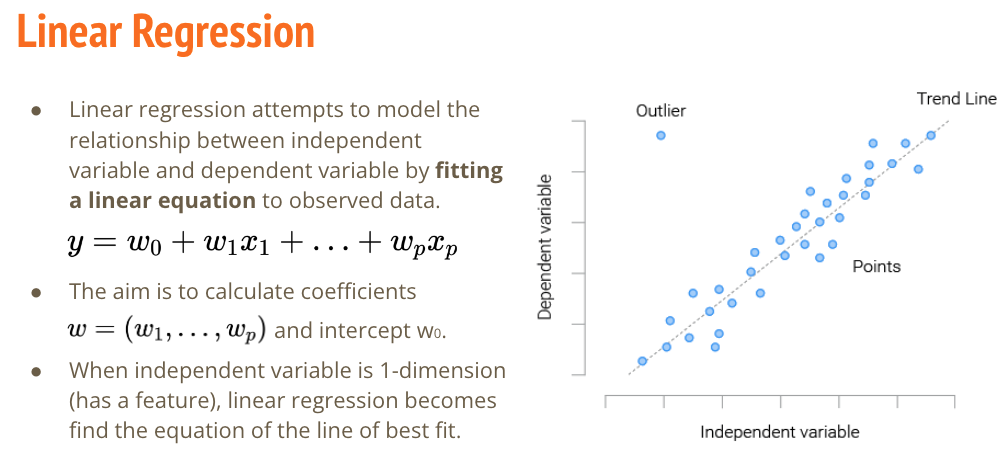

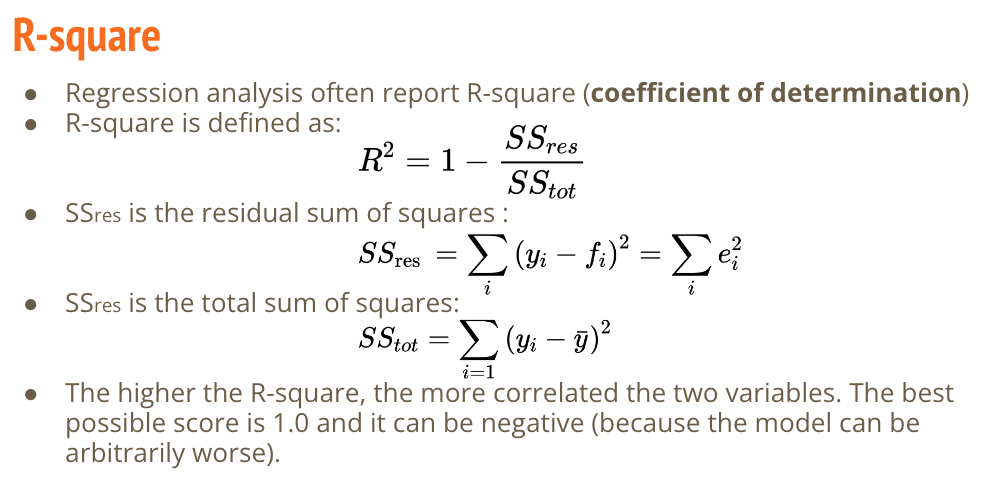

### Example: Predict the height of a student given her/his grade
- A simple linear regression task 
- The independent variable is grade
- The dependent varibale is height
- The independent variable only has a feature

In [5]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Height')

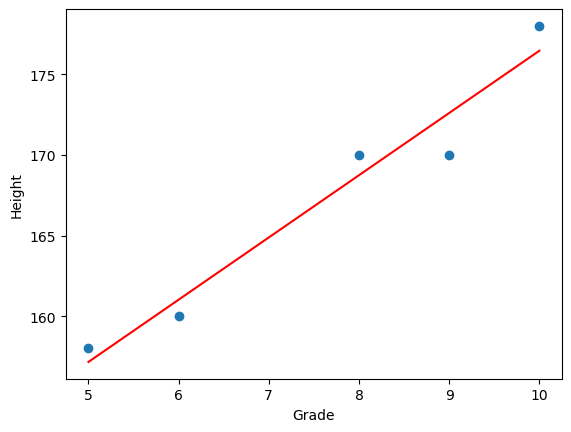

In [6]:
# collect data from you
Grade = np.array([6, 5, 9, 8, 10]).reshape(-1,1)
Height = np.array([160, 158, 170, 170, 178]).reshape(-1,1)
plt.scatter(Grade, Height)

# use the Least Square Method  y = 3.86x + 137.86
plt.plot(np.linspace(5,10,100),3.86*np.linspace(5,10,100)+137.86,'r')
plt.xlabel('Grade')
plt.ylabel('Height')

In [7]:
# use linear regression to fit model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(Grade, Height)
print('coefficients:\t' + str(reg.coef_.item()))
print('intercept:\t' + str(reg.intercept_.item()))
print('R2 score:\t' + str(reg.score(Grade,Height)))
print('The predicted height of a student in grade 7 is ' + str(reg.predict(np.array([[7]])).item()) + ' cm')

coefficients:	3.86046511627907
intercept:	137.86046511627904
R2 score:	0.9536267995570321
The predicted height of a student in grade 7 is 164.88372093023253 cm


### Example 2: Predict the dependent variable (y) when independent variable (x) has two features
- compute coefficients, intercept and R2 score
- predict the y value when x =[3, 5]

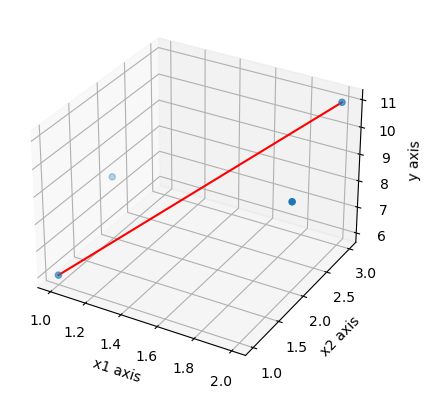

In [10]:
# y = 1 * x_1 + 2 * x_2 + 3
x1 = np.linspace(1,2,100)
x2 = np.linspace(1,3,100)
y = np.dot(np.stack((x1,x2), axis=1),np.array([1, 2])) + 3

## The data you have (data points)
x_point = np.array([[1, 1], 
                   [1, 2], 
                   [2, 2], 
                   [2, 3]])
x1_point = x_point[:,0] # the first feature
x2_point = x_point[:,1] # the second feature
y_point = np.dot(x_point, np.array([1, 2])) + 3

fig = plt.figure()
ax1 = plt.axes(projection='3d') 
ax1.plot3D(x1,x2,y,'red') 
ax1.scatter3D(x1_point,x2_point,y_point, cmap='b') 
ax1.set_xlabel('x1 axis')
ax1.set_ylabel('x2 axis')
ax1.set_zlabel('y axis')
plt.show()

### Examples for other regression models/methods

In [15]:
# Data
X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_1 + 2 * x_2 + 3
y = np.dot(X, np.array([1, 2])) + 3

In [16]:
# use linear regression to fit model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X, y))
print(reg.predict(np.array([[3, 5]])))

[1. 2.]
3.0000000000000018
1.0
[16.]


In [17]:
from sklearn.linear_model import Ridge
reg = Ridge()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X, y))
print(reg.predict(np.array([[3, 5]])))

[0.8 1.4]
4.5
0.923076923076923
[13.9]


In [19]:
from sklearn.linear_model import Lasso
reg = Lasso()
reg.fit(X, y)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X, y))
print(reg.predict(np.array([[3, 5]])))

[0.  0.5]
7.5
0.34615384615384615
[10.]


In [20]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0).fit(X, y)
print(clf.predict(X[:2, :]))
print(clf.predict_proba(X[:2, :]))
print(clf.score(X, y))

[0 0]
[[9.81784682e-01 1.82153032e-02 1.44214567e-08]
 [9.71704765e-01 2.82952046e-02 3.01501545e-08]]
0.9733333333333334


/home/bobohope/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Exercise: Practice with Canadian census data


In [17]:
import pandas as pd

In [18]:
CENSUS_DATA_BASE_PATH = './census_data/'


In [19]:
raw_2021 = pd.read_csv(CENSUS_DATA_BASE_PATH +'2021_census.csv', encoding = 'latin-1')

/tmp/ipykernel_18744/2121620576.py:1: DtypeWarning: Columns (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,65,66,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,123,124,125,126,127,128,129,130,131,133,134,136,137,138,139,140,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,2

In [20]:
raw_2021['Census_2021_CID'] = raw_2021.index
raw_2021['Census_2021_CID'] = 'Census_2021_CID_'+raw_2021['Census_2021_CID'].astype(str)

In [21]:
raw_2021

,Characteristics,Canada (CTRY) (01) (20000),Newfoundland and Labrador (PR) (10) (00000),"Division No. 1, CDR (Census division) (CD) (1001) (00000)","Division No. 1, Subd. V, SNO (Subdivision of unorganized) (CSD) (1001101) (01919)","Portugal Cove South, T (Town) (CSD) (1001105) (00909)","Trepassey, T (Town) (CSD) (1001113) (00000)","St. Shott's, T (Town) (CSD) (1001120) (00909)","Division No. 1, Subd. U, SNO (Subdivision of unorganized) (CSD) (1001124) (01010)","Cape Broyle, T (Town) (CSD) (1001126) (00000)",...,"Kitikmeot, REG (Region) (CD) (6208) (01020)","Kugaaruk, HAM (Hamlet) (CSD) (6208047) (01020)","Kugluktuk, HAM (Hamlet) (CSD) (6208059) (01020)","Bathurst Inlet, SET (Settlement) (CSD) (6208065) (09999)","Umingmaktok, SET (Settlement) (CSD) (6208068) (09999)","Cambridge Bay, HAM (Hamlet) (CSD) (6208073) (01010)","Gjoa Haven, HAM (Hamlet) (CSD) (6208081) (01030)","Taloyoak, HAM (Hamlet) (CSD) (6208087) (02030)","Kitikmeot, Unorganized, NO (Unorganized) (CSD) (6208098) (09999)",Census_2021_CID
0,"Population, 2021",36991981,510550,271878,55,86,405,55,1373,499,...,6458,1033,1382,0,0,1760,1349,934,0,Census_2021_CID_0
1,"Population, 2016",35151728,519716,270348,36,150,481,66,1625,489,...,6543,933,1491,0,0,1766,1324,1029,0,Census_2021_CID_1
2,"Population percentage change, 2016 to 2021",5,-2,1,53,-43,-16,-17,-16,2,...,-1,11,-7,...,...,0,2,-9,...,Census_2021_CID_2
3,Total private dwellings,16284235,269184,135137,72,85,299,50,1320,314,...,1954,225,438,0,0,701,339,251,0,Census_2021_CID_3
4,Private dwellings occupied by usual residents,14978941,223253,117178,29,47,224,34,628,228,...,1677,214,397,0,0,571,292,203,0,Census_2021_CID_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2618,Between 6 a.m. and 6:59 a.m.,2274845,22605,12035,0,0,30,0,90,25,...,45,10,10,x,x,15,15,0,x,Census_2021_CID_2618
2619,Between 7 a.m. and 7:59 a.m.,3435740,53845,30995,15,0,10,0,115,60,...,260,15,45,x,x,140,45,20,x,Census_2021_CID_2619
2620,Between 8 a.m. and 8:59 a.m.,2711355,48930,27515,0,15,40,0,110,40,...,1090,120,215,x,x,440,195,115,x,Census_2021_CID_2620
2621,Between 9 a.m. and 11:59 a.m.,1661340,20935,11745,0,0,0,0,40,25,...,265,35,55,x,x,65,65,45,x,Census_2021_CID_2621


In [22]:
# extract census area info, you don't need to modify this block
import re

def extract_CSDUID (combined_area_index):
    title_search = re.search('\(\d{7}\)', combined_area_index, re.IGNORECASE)
    if title_search:
        return title_search.group(0)[1:-1]
    else:
        return
def extract_PUID(combined_area_index):
    title_search = re.search('\(\d{2}\)', combined_area_index, re.IGNORECASE)
    if title_search:
        return title_search.group(0)[1:-1]
    else:
        return
def extract_CDUID(combined_area_index):
    title_search = re.search('\(\d{4}\)', combined_area_index, re.IGNORECASE)
    if title_search:
        return title_search.group(0)[1:-1]
    else:
        return
    
def transform_dataset_CSD(df, year):

    t_df = df.set_index(['Characteristics']).T
    if 'Profile of CD/C' in df.columns:
        t_df.drop(['Profile of CD/C'], inplace=True)
    if 'Profile of Cens' in df.columns:
        t_df.drop(['Profile of Cens'], inplace=True)
    t_df['CDUID'] = t_df.index.map(extract_CDUID)
    t_df['YEAR'] = year
    t_df.dropna(subset=['CDUID'],inplace=True)
    t_df.set_index('CDUID', inplace=True)
    t_df[f"year_{year}"]=1
    return t_df

def transform_dataset_CSD(df, year):
    

    t_df = df.set_index(['Characteristics']).T
    if 'Profile of CD/C' in df.columns:
        t_df.drop(['Profile of CD/C'], inplace=True)
    if 'Profile of Cens' in df.columns:
        t_df.drop(['Profile of Cens'], inplace=True)
    t_df['CSDUID'] = t_df.index.map(extract_CSDUID)
    t_df['YEAR'] = year
    t_df.dropna(subset=['CSDUID'],inplace=True)
    t_df.set_index('CSDUID', inplace=True)
    t_df[f"year_{year}"]=1
    return t_df

In [23]:
t_2021_df = transform_dataset_CSD(raw_2021,2021)

In [24]:
t_2021_df

Characteristics,"Population, 2021","Population, 2016","Population percentage change, 2016 to 2021",Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Total - Age groups of the population - 100% data,0 to 14 years,0 to 4 years,...,60 minutes and over,Total - Time leaving for work for the employed labour force aged 15 years and over with a usual place of work or no fixed workplace address - 25% sample data,Between 5 a.m. and 5:59 a.m.,Between 6 a.m. and 6:59 a.m.,Between 7 a.m. and 7:59 a.m.,Between 8 a.m. and 8:59 a.m.,Between 9 a.m. and 11:59 a.m.,Between 12 p.m. and 4:59 a.m.,YEAR,year_2021
CSDUID,,,,,,,,,,,,,,,,,,,,,
1001101,55,36,53,72,29,0,871,55,0,0,...,0,15,0,0,15,0,0,0,2021,1
1001105,86,150,-43,85,47,80,1,85,0,0,...,0,25,0,0,0,15,0,0,2021,1
1001113,405,481,-16,299,224,8,54,405,25,0,...,20,105,0,30,10,40,0,20,2021,1
1001120,55,66,-17,50,34,51,1,55,0,0,...,0,0,0,0,0,0,0,0,2021,1
1001124,1373,1625,-16,1320,628,2,742,1370,150,45,...,55,430,20,90,115,110,40,55,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6208068,0,0,...,0,0,0,100,x,x,x,...,x,x,x,x,x,x,x,x,2021,1
6208073,1760,1766,0,701,571,9,196,1760,425,135,...,0,720,10,15,140,440,65,50,2021,1
6208081,1349,1324,2,339,292,47,29,1350,505,185,...,0,360,0,15,45,195,65,50,2021,1


In [25]:
MAP_SHAPE_FILE_PATH = "./canada_census_map_2021/lcsd_000b21a_e/lcsd000b21a_e.shp"

import geopandas
import pandas as pd
import pandas_bokeh
import matplotlib.pyplot as plt
pandas_bokeh.output_notebook()

canada= geopandas.read_file(MAP_SHAPE_FILE_PATH)

Loading BokehJS ...

In [26]:
ontario = canada[canada['PRUID'] == '35']

In [27]:
ontario

,CSDUID,DGUID,CSDNAME,CSDTYPE,LANDAREA,PRUID,geometry
2113,3501005,2021A00053501005,South Glengarry,TP,605.0159,35,"MULTIPOLYGON (((7569716.417 1174450.300, 75697..."
2114,3501007,2021A00053501007,Akwesasne (Part) 59,IRI,11.8096,35,"MULTIPOLYGON (((7569718.737 1174468.851, 75697..."
2115,3501011,2021A00053501011,South Stormont,TP,447.7113,35,"MULTIPOLYGON (((7535688.774 1153468.380, 75356..."
2116,3501012,2021A00053501012,Cornwall,CY,61.5044,35,"MULTIPOLYGON (((7556468.846 1165197.760, 75564..."
2117,3501020,2021A00053501020,South Dundas,MU,521.5418,35,"MULTIPOLYGON (((7517713.134 1134467.460, 75177..."
...,...,...,...,...,...,...,...
2685,3560096,2021A00053560096,Kasabonika Lake,IRI,101.7303,35,"MULTIPOLYGON (((6413249.386 1936213.623, 64132..."
2686,3560097,2021A00053560097,Muskrat Dam Lake,IRI,24.7125,35,"MULTIPOLYGON (((6206241.757 1916260.806, 62062..."
2687,3560098,2021A00053560098,Kingfisher Lake 1,IRI,9.1173,35,"POLYGON ((6334244.569 1877016.134, 6334257.551..."
2688,3560100,2021A00053560100,Wawakapewin,IRI,53.0382,35,"POLYGON ((6383810.311 1932408.637, 6383837.686..."


In [28]:
new_data = canada[['CSDUID','CSDNAME']].join(t_2021_df, on=['CSDUID'])

In [29]:
new_data

,CSDUID,CSDNAME,"Population, 2021","Population, 2016","Population percentage change, 2016 to 2021",Total private dwellings,Private dwellings occupied by usual residents,Population density per square kilometre,Land area in square kilometres,Total - Age groups of the population - 100% data,...,60 minutes and over,Total - Time leaving for work for the employed labour force aged 15 years and over with a usual place of work or no fixed workplace address - 25% sample data,Between 5 a.m. and 5:59 a.m.,Between 6 a.m. and 6:59 a.m.,Between 7 a.m. and 7:59 a.m.,Between 8 a.m. and 8:59 a.m.,Between 9 a.m. and 11:59 a.m.,Between 12 p.m. and 4:59 a.m.,YEAR,year_2021
0,1001101,"Division No. 1, Subd. V",55,36,53,72,29,0,871,55,...,0,15,0,0,15,0,0,0,2021,1
1,1001105,Portugal Cove South,86,150,-43,85,47,80,1,85,...,0,25,0,0,0,15,0,0,2021,1
2,1001113,Trepassey,405,481,-16,299,224,8,54,405,...,20,105,0,30,10,40,0,20,2021,1
3,1001120,St. Shott's,55,66,-17,50,34,51,1,55,...,0,0,0,0,0,0,0,0,2021,1
4,1001124,"Division No. 1, Subd. U",1373,1625,-16,1320,628,2,742,1370,...,55,430,20,90,115,110,40,55,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,6208068,Umingmaktok,0,0,...,0,0,0,100,x,...,x,x,x,x,x,x,x,x,2021,1
5157,6208073,Cambridge Bay,1760,1766,0,701,571,9,196,1760,...,0,720,10,15,140,440,65,50,2021,1
5158,6208081,Gjoa Haven,1349,1324,2,339,292,47,29,1350,...,0,360,0,15,45,195,65,50,2021,1
5159,6208087,Taloyoak,934,1029,-9,251,203,26,35,935,...,0,180,0,0,20,115,45,10,2021,1


In [30]:
selected_col = ['CSDUID',
                'CSDNAME',
                '    Median employment income in 2020 for full-year full-time workers in 2020 ($)',
                'Average household size',
                'Prevalence of low income based on the Low-income measure, after tax (LIM-AT) (%)',
                'Total - Occupied private dwellings by dwelling condition - 25% sample data',
                '  Only regular maintenance and minor repairs needed',
                '  Major repairs needed',
               '  % in core housing need']

In [31]:
selected_df = new_data[selected_col]

In [32]:
selected_df

,CSDUID,CSDNAME,Median employment income in 2020 for full-year full-time workers in 2020 ($),Average household size,"Prevalence of low income based on the Low-income measure, after tax (LIM-AT) (%)",Total - Occupied private dwellings by dwelling condition - 25% sample data,Only regular maintenance and minor repairs needed,Major repairs needed,% in core housing need,% in core housing need
0,1001101,"Division No. 1, Subd. V",x,2,x,20,20,0,0,...
1,1001105,Portugal Cove South,x,2,x,40,40,0,0,...
2,1001113,Trepassey,63200,2,26,205,185,20,10,...
3,1001120,St. Shott's,x,2,x,45,45,0,0,...
4,1001124,"Division No. 1, Subd. U",52800,2,10,630,600,25,4,0
...,...,...,...,...,...,...,...,...,...,...
5156,6208068,Umingmaktok,x,x,x,x,x,x,x,x
5157,6208073,Cambridge Bay,105000,3,13,570,450,120,12,30
5158,6208081,Gjoa Haven,56000,5,12,295,175,120,22,48
5159,6208087,Taloyoak,66000,5,17,200,110,95,67,55


In [33]:
selected_col_renamed = ['CSDUID',
            'CSDNAME',
            'full_time_medium_income',
            'average_household_size',
            "%_low_income",
            'total_dwelling_count',
            'dwelling_need_regular_or_minor_repair',
            'dwelling_need_major_repair',
            '%_in_core_housing_need_owner',
            '%_in_core_housing_need_tenant']

In [34]:
selected_df.columns = selected_col_renamed

In [35]:
selected_df

,CSDUID,CSDNAME,full_time_medium_income,average_household_size,%_low_income,total_dwelling_count,dwelling_need_regular_or_minor_repair,dwelling_need_major_repair,%_in_core_housing_need_owner,%_in_core_housing_need_tenant
0,1001101,"Division No. 1, Subd. V",x,2,x,20,20,0,0,...
1,1001105,Portugal Cove South,x,2,x,40,40,0,0,...
2,1001113,Trepassey,63200,2,26,205,185,20,10,...
3,1001120,St. Shott's,x,2,x,45,45,0,0,...
4,1001124,"Division No. 1, Subd. U",52800,2,10,630,600,25,4,0
...,...,...,...,...,...,...,...,...,...,...
5156,6208068,Umingmaktok,x,x,x,x,x,x,x,x
5157,6208073,Cambridge Bay,105000,3,13,570,450,120,12,30
5158,6208081,Gjoa Haven,56000,5,12,295,175,120,22,48
5159,6208087,Taloyoak,66000,5,17,200,110,95,67,55


In [51]:
selected_df.to_csv('census_data/selected_df.csv',index=False)

### Step Instructions
STEP1: data preprocessing 
   - use the mean of known values to impute the missing values
   - some data need manipulation
   - select X columns and y

STEP2: split data into training and testing set
   - Use `train_test_split` function
   - from sklearn.model_selection import train_test_split
   
STEP3: fit the linear model for this regression task
   - Use `LinearRegression` package
   - from sklearn.linear_model import LinearRegression
   
STEP4: evaluate estimator (the fitted model)
   - Metrics: R-square value, root mean square error, normalize root mean square error, etc.
   - from sklearn.metrics import mean_squared_error

##### Step 1

In [36]:
# step 1
# first you need to replace x and ... with some numerical value
selected_df2 = selected_df.replace('x', '-999')
selected_df2 = selected_df2.replace('...','-999')

In [37]:
# then create an imputer to replace -999 using mean strategy
# --- student answer here ----#







In [39]:
# then use the imputer to fit and transform the columns that need the transformation

imputer = imp_mean.fit(selected_df2[['full_time_medium_income',
            'average_household_size',
            "%_low_income",
            'total_dwelling_count',
            'dwelling_need_regular_or_minor_repair',
            'dwelling_need_major_repair',
            '%_in_core_housing_need_owner',
            '%_in_core_housing_need_tenant']])
selected_df2[['full_time_medium_income',
            'average_household_size',
            "%_low_income",
            'total_dwelling_count',
            'dwelling_need_regular_or_minor_repair',
            'dwelling_need_major_repair',
            '%_in_core_housing_need_owner',
            '%_in_core_housing_need_tenant']] = imputer.transform(selected_df2[['full_time_medium_income',
            'average_household_size',
            "%_low_income",
            'total_dwelling_count',
            'dwelling_need_regular_or_minor_repair',
            'dwelling_need_major_repair',
            '%_in_core_housing_need_owner',
            '%_in_core_housing_need_tenant']])

In [40]:
selected_df2

,CSDUID,CSDNAME,full_time_medium_income,average_household_size,%_low_income,total_dwelling_count,dwelling_need_regular_or_minor_repair,dwelling_need_major_repair,%_in_core_housing_need_owner,%_in_core_housing_need_tenant
0,1001101,"Division No. 1, Subd. V",55137.275785,2.000000,15.083903,20.000000,20.000000,0.000000,0.000000,12.11158
1,1001105,Portugal Cove South,55137.275785,2.000000,15.083903,40.000000,40.000000,0.000000,0.000000,12.11158
2,1001113,Trepassey,63200.000000,2.000000,26.000000,205.000000,185.000000,20.000000,10.000000,12.11158
3,1001120,St. Shott's,55137.275785,2.000000,15.083903,45.000000,45.000000,0.000000,0.000000,12.11158
4,1001124,"Division No. 1, Subd. U",52800.000000,2.000000,10.000000,630.000000,600.000000,25.000000,4.000000,0.00000
...,...,...,...,...,...,...,...,...,...,...
5156,6208068,Umingmaktok,55137.275785,2.397408,15.083903,3315.521364,3112.078813,203.211202,4.657602,12.11158
5157,6208073,Cambridge Bay,105000.000000,3.000000,13.000000,570.000000,450.000000,120.000000,12.000000,30.00000
5158,6208081,Gjoa Haven,56000.000000,5.000000,12.000000,295.000000,175.000000,120.000000,22.000000,48.00000
5159,6208087,Taloyoak,66000.000000,5.000000,17.000000,200.000000,110.000000,95.000000,67.000000,55.00000


In [41]:
selected_df2['%_dwelling_need_regular_or_minor_repair'] = selected_df2['dwelling_need_regular_or_minor_repair']/selected_df2['total_dwelling_count']*100
selected_df2['%_dwelling_need_major_repair'] = selected_df2['dwelling_need_major_repair']/selected_df2['total_dwelling_count']*100
selected_df2['%_in_core_housing_need_total'] = selected_df2['%_in_core_housing_need_owner'] + selected_df2['%_in_core_housing_need_tenant']

In [42]:
selected_df2


,CSDUID,CSDNAME,full_time_medium_income,average_household_size,%_low_income,total_dwelling_count,dwelling_need_regular_or_minor_repair,dwelling_need_major_repair,%_in_core_housing_need_owner,%_in_core_housing_need_tenant,%_dwelling_need_regular_or_minor_repair,%_dwelling_need_major_repair,%_in_core_housing_need_total
0,1001101,"Division No. 1, Subd. V",55137.275785,2.000000,15.083903,20.000000,20.000000,0.000000,0.000000,12.11158,100.000000,0.000000,12.111580
1,1001105,Portugal Cove South,55137.275785,2.000000,15.083903,40.000000,40.000000,0.000000,0.000000,12.11158,100.000000,0.000000,12.111580
2,1001113,Trepassey,63200.000000,2.000000,26.000000,205.000000,185.000000,20.000000,10.000000,12.11158,90.243902,9.756098,22.111580
3,1001120,St. Shott's,55137.275785,2.000000,15.083903,45.000000,45.000000,0.000000,0.000000,12.11158,100.000000,0.000000,12.111580
4,1001124,"Division No. 1, Subd. U",52800.000000,2.000000,10.000000,630.000000,600.000000,25.000000,4.000000,0.00000,95.238095,3.968254,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,6208068,Umingmaktok,55137.275785,2.397408,15.083903,3315.521364,3112.078813,203.211202,4.657602,12.11158,93.863935,6.129087,16.769181
5157,6208073,Cambridge Bay,105000.000000,3.000000,13.000000,570.000000,450.000000,120.000000,12.000000,30.00000,78.947368,21.052632,42.000000
5158,6208081,Gjoa Haven,56000.000000,5.000000,12.000000,295.000000,175.000000,120.000000,22.000000,48.00000,59.322034,40.677966,70.000000
5159,6208087,Taloyoak,66000.000000,5.000000,17.000000,200.000000,110.000000,95.000000,67.000000,55.00000,55.000000,47.500000,122.000000


In [43]:
X_col_names=['full_time_medium_income',
            'average_household_size',
            "%_low_income",
            '%_dwelling_need_regular_or_minor_repair',
            '%_dwelling_need_major_repair']
y_col_name = '%_in_core_housing_need_total'

In [44]:
X = selected_df2[X_col_names]
y = selected_df2[y_col_name]

##### Step 2

In [45]:
# do 80:20 split
# --- student answer here -- #
from sklearn.model_selection import train_test_split



##### Step 3

In [47]:
# --- student answer here -- #


,observed,predicted
1209,0.00000,14.846043
4114,7.00000,18.966605
37,33.00000,18.088351
3209,21.11158,18.918372
1853,27.00000,13.900393


##### Step 4

In [48]:
from sklearn.metrics import mean_squared_error


In [1]:
# student answer here, need to calculate R square value, and RMSE

